#**Paper for our Model:-https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf**

#**Imports :**

In [1]:
import os
import cv2
import torch
import random
import shutil
import zipfile
import numpy as np
from torch import nn
from PIL import Image
import matplotlib.pyplot as plt

###Setting up device Agnostic Code:
PyTorch does not provide a specific setting to control GPU memory growth like TensorFlow does. Instead, it allocates GPU memory dynamically and incrementally as needed during runtime.

In [2]:
device="cuda" if torch.cuda.is_available() else "cpu"

###Create Data Folder Structure

In [32]:
pos_path=os.path.join("data","positive")
neg_path=os.path.join("data","negative")
anc_path=os.path.join("data","anchor")
os.makedirs(pos_path,exist_ok=True)
os.makedirs(neg_path,exist_ok=True)
os.makedirs(anc_path,exist_ok=True)

#**DataSet and Preprocessing :**

###Unpack labelled Faces in the wild Dataset

###Move All the images from the Folders outside folders and delete all those extra folders  

In [12]:
import os
import shutil
from pathlib import Path

# Paths
dataset_folder = Path("./Facial_Dataset/lfw-deepfunneled") 
negative_folder = Path("./data/negative")

# Walk through all subfolders and move images
count = 0
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.lower().endswith(".jpg"):
            src_path = Path(root) / file
            dest_path = negative_folder / file
            shutil.move(str(src_path), str(dest_path))
            count += 1

print(f"Moved {count} images to {negative_folder}")


Moved 13233 images to data\negative


###Collecting Images for our Postive and Anchor Folder using OpenCV

In [26]:
#(frame[120:120+250,200:200+250,:]).shape for Making the dimension of the web cam same as our training negative images dimensions:

In [27]:
#Importing uuid for generating unique image names:
import uuid

In [34]:
#Establish Connection to our webCam:
cap=cv2.VideoCapture(0)
while cap.isOpened():
  ret,frame=cap.read()
    
  #to bring the frame to 250*250 pixels as our Training images
  frame=frame[120:120+250,200:200+250,:]

  #Collect for Anchor:
  if cv2.waitKey(1) & 0XFF ==ord ('a'):
      #creating path for our image that is going to be stored:
      imgname=os.path.join(anc_path,'{}.jpg'.format(uuid.uuid1()))
      #saving the image into our anchor folder:
      cv2.imwrite(imgname,frame)

  #Collect for Positive:
  if cv2.waitKey(1) & 0XFF ==ord ('p'):
      #creating path for our image that is going to be stored:
      imgname=os.path.join(pos_path,'{}.jpg'.format(uuid.uuid1()))
      #saving the image into our positive folder:
      cv2.imwrite(imgname,frame)
    
    
  #showing image back to screen:
  cv2.imshow('Image Collection',frame)

  if cv2.waitKey(1) & 0XFF ==ord ('q'):
    break
      
#Release the web Cam:
cap.release()
#Close the image show frameq
cv2.destroyAllWindows()

###If we got error: src.empty() in function 'cv::cvtColor' or no error still the pop up will not come this means not the right webcam number.

(250, 250, 3)


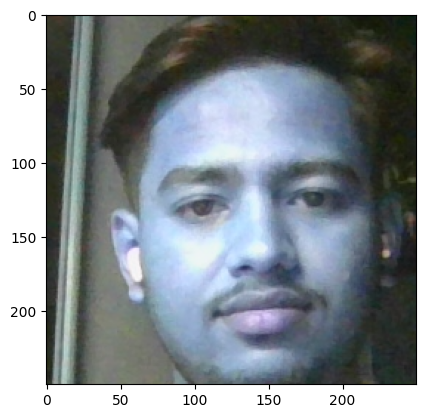

In [25]:
plt.imshow(frame)
print(frame.shape)